# Assignment 2 (10 points)
(due on Oct. 23, 8:am)

In the second assignment, we create our own simple neural network, a multi layer perceptron  (MLP) which takes in vectorized CIFAR-10 images and returns a 10-dimensional output.

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST, CIFAR10
import torchvision.transforms as transforms
from torch.utils.data.dataset import Subset

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

from sklearn.model_selection import StratifiedShuffleSplit

torch.manual_seed(1234);
np.random.seed(1234);

First, we download the *training* split of CIFAR-10, and collect all labels.

In [2]:
ds_train = CIFAR10('/tmp/cifar', 
                 train=True, 
                 transform=transforms.ToTensor(), 
                 target_transform=None, 
                 download=True)

lab = [ds_train[x][1] for x in range(len(ds_train))]

Files already downloaded and verified


In [3]:
from collections import Counter
Counter(lab)

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [4]:
classes = ['plane', 
           'car', 
           'bird', 
           'cat',
           'deer', 
           'dog', 
           'frog', 
           'horse', 
           'ship', 
           'truck']

This dataset contains natural images. We have a total of 50,000 images available. Elements from the dataset `ds_train` are tuple of the form (image, label). We can access, e.g., the first image via

In [5]:
img = ds_train[0][0] # first image in the dataset (a tensor)

... and its label via

In [6]:
img_lab = ds_train[0][1] # label of the first image in the dataset
print('{} ({})'.format(img_lab, classes[img_lab]))

6 (frog)


In [7]:
def generate_train_indices(n_splits, train_size, lab):
    s = StratifiedShuffleSplit(
        n_splits=n_splits, 
        train_size=train_size, 
        test_size=None)
    
    return [i.tolist() for i, _ in s.split(lab, lab)]

train_indices = generate_train_indices(10, 500, lab)

We can now use `torch.utils.data.dataset.Subset` to create subsets of the original MNIST dataset. Lets do this for the first of the 10 lists.

In [8]:
ds_train_subset = Subset(ds_train, train_indices[1])

We created the indices in such a way that each class is represented in a balanced manner (i.e., stratified). Let's check:

In [9]:
from collections import Counter
print(Counter([ds_train_subset[i][1] for i in range(len(ds_train_subset))]))

Counter({2: 50, 3: 50, 8: 50, 6: 50, 9: 50, 0: 50, 4: 50, 7: 50, 1: 50, 5: 50})


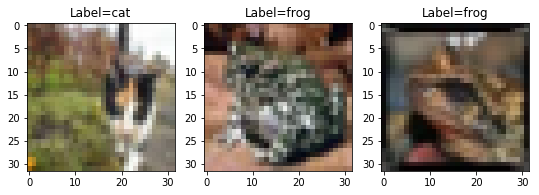

In [10]:
def show_images(ds: torchvision.datasets.cifar.CIFAR10, 
                indices: list):
    assert len(indices) == 3
    assert np.max(indices) < len(ds)
    
    plt.figure(figsize=(9,3));
    for j,idx in enumerate(indices):
        plt.subplot(1,3,j+1)
        plt.imshow(ds[idx][0].permute(1,2,0).numpy())
        plt.title('Label={}'.format(classes[ds[idx][1]]))

show_images(ds_train_subset, [1,3,498])

Your **first task** is to create a neural network as a class derived from `nn.Module` which implements the following mapping:

$$f: \mathbb{R}^{32 \cdot 32 \cdot 3} \to \mathbb{R}^{10}$$

$$ \mathbf{x} \mapsto \mathbf{A}_2\text{ReLU}(\mathbf{A}_1\mathbf{x})$$

with $\mathbf{A} \in \mathbb{R}^{100 \times 3072}$ and $\mathbf{A}_2 \in \mathbb{R}^{100 \times 10}$.

**Hints**:
- Use `nn.ReLU` or implement it yourself with `torch.clamp`
- Read the documentation on how to exclude the *bias* terms from the affine maps

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes=10):
        # your implementation goes here
        pass
    def forward(self, x):
        # your implementation goes here
        pass

Your **second task** is to test the network by feeding it (in the appropriate tensor shape) with data from your dataset of 500 
training instances.

We will do this using PyTorch's dataloader, initialized with `ds_train_subset`.

In [ ]:
net = NeuralNet(32*32*3, 100, 10)

from torch.utils.data import DataLoader

dl = DataLoader(ds_train_subset, 
                batch_size=16, 
                shuffle=True)

x,y = next(iter(dl))
out = net(#your code goes here)
print(out.size())

Finally, the **third task** is to (1) count the number of *learnable* parametes by hand and (2) to then write a short function to count it.

In [34]:
def count_params(net):
    num_param = 0
    # your implementation goes here
    return num_param